**NMST Handwritten Digit Classification using Deep Learning(Neural Network)**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

Loading the MNIST data from keras.datasets

In [2]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [3]:
type(X_train)

numpy.ndarray

In [4]:
#shape of the numpy array
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


Training data - 60,000 Images

Test data - 10,000 Images

Image Dimension - 28*28

GrayScale Image - 1 Channel

In [5]:
#print the 10th image
print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [6]:
print(X_train.shape)

(60000, 28, 28)


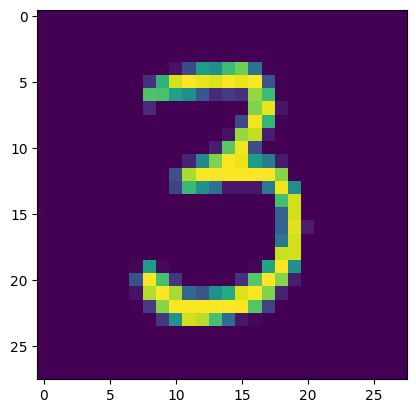

2


In [7]:
# displaying the image
plt.imshow(X_train[50])
plt.show()

#print the corresponding label
print(Y_train[25])

Image Labels

In [8]:
print(Y_train.shape, Y_test.shape)

(60000,) (10000,)


In [9]:
#unique values in Y_train
print(np.unique(Y_train))

#unique values in Y_test
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


We can use this label as such or we can also appy One Hot Encoding

All the Images have the same dimension

In [10]:
#scaling the values

X_train = X_train/255
X_test = X_test/255

In [11]:
#print 10th image
print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Building the Neural Network

In [12]:
# setting up the layers of the Neural  Network

model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(10, activation='sigmoid')
])

In [13]:
#Compiling the Neural Network

model.compile(optimizer = 'adam',
              loss= 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [14]:
#training the Neural Network

model.fit(X_train, Y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2895 - accuracy: 0.9161
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1358 - accuracy: 0.9597
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1001 - accuracy: 0.9697
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0803 - accuracy: 0.9756
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0654 - accuracy: 0.9799
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0567 - accuracy: 0.9822
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0480 - accuracy: 0.9847
Epoch 8/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0438 - accuracy: 0.9854
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0372 - accuracy: 0.9875
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.033

Trainig data accuracy = 0.9882%

**Accuracy on Test Data**



In [15]:
loss, accuracy = model.evaluate(X_test, Y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0981 - accuracy: 0.9739


Test data Accuracy = 0.9765

In [16]:
print(X_test.shape)

(10000, 28, 28)


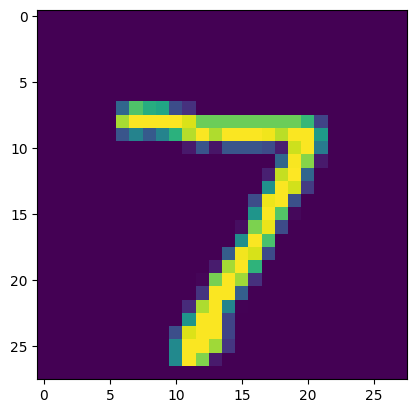

In [17]:
#first data point in X_test
plt.imshow(X_test[0])
plt.show()

In [18]:
print(Y_test[0])

7


In [19]:
Y_pred = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [20]:
print(Y_pred.shape)

(10000, 10)


In [21]:
print(Y_pred[0])

[4.3303829e-02 8.1614999e-05 5.4781742e-02 1.4506751e-01 2.2501482e-07
 6.8399771e-03 1.4788216e-10 9.9999440e-01 2.3444162e-01 1.7515741e-01]


model.predict() gives the prediction probability of each class for that data point

In [22]:
#converting the prediction probablity to class label

label_for_first_image= np.argmax(Y_pred[0])

In [23]:
print(label_for_first_image)

7


In [24]:
#converting the prediction probality for all datasets

Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9, 0, 6, 9, 0, 1, 5, 9, 7, 8, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 5, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 4, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 0, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 8, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [25]:
print(Y_pred)

[[4.3303829e-02 8.1614999e-05 5.4781742e-02 ... 9.9999440e-01
  2.3444162e-01 1.7515741e-01]
 [3.2882047e-01 3.3191374e-01 1.0000000e+00 ... 1.2300629e-08
  6.2497988e-02 7.0468731e-10]
 [2.0658757e-05 9.9982834e-01 3.2064712e-03 ... 4.4524595e-01
  5.2761155e-01 1.5350357e-02]
 ...
 [5.8015710e-12 2.2179673e-04 1.0507077e-06 ... 7.1549165e-01
  8.0319718e-03 9.7674060e-01]
 [2.8569107e-07 2.9892928e-04 2.6358333e-09 ... 7.1621436e-04
  9.8389012e-01 1.8702995e-07]
 [6.7000445e-03 2.4886572e-01 7.1579314e-05 ... 1.8801494e-08
  5.8100974e-05 1.1875239e-07]]


Y_test - True Labels

Y_pred_labels - Predicted Labels

Confusion Matrix

In [26]:
conf_mat = confusion_matrix(Y_test, Y_pred_labels)

In [27]:
print(conf_mat)

tf.Tensor(
[[ 971    0    1    0    1    3    2    0    2    0]
 [   0 1124    2    1    0    2    2    1    3    0]
 [   4    2 1001    2    3    2    1    5   12    0]
 [   0    1    3  970    1   11    0    8   10    6]
 [   0    0    3    1  961    0    5    3    1    8]
 [   1    0    0    5    1  875    4    2    3    1]
 [   4    2    0    1    8    4  938    0    1    0]
 [   1    3    9    0    1    0    0 1010    1    3]
 [   8    0    2    3    8    8    1    5  933    6]
 [   1    2    0    7   20    3    1   15    4  956]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

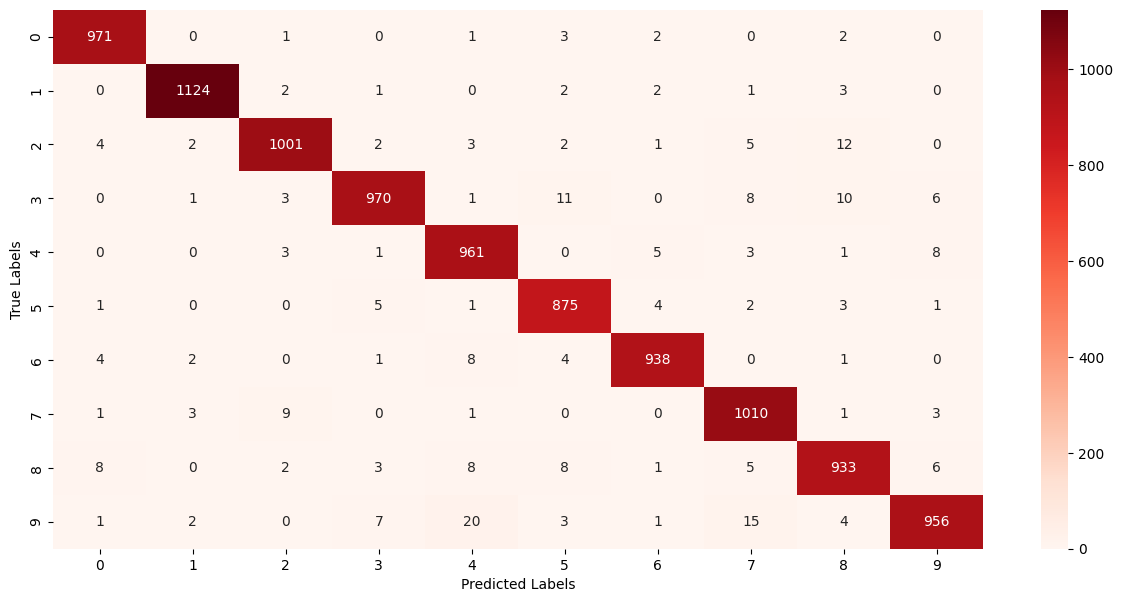

In [28]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot= True, fmt = 'd', cmap = 'Reds')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

Build a Predictive Sytem

In [29]:
input_image_path = '/content/sample_data/33.jpg'
input_image = cv2.imread(input_image_path)

In [30]:
print(input_image)

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


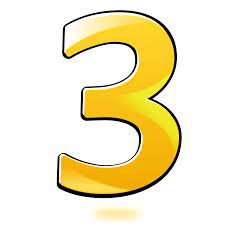

In [31]:
cv2_imshow(input_image)

In [32]:
input_image.shape

(225, 225, 3)

In [33]:
grayscale = cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)

In [34]:
grayscale.shape

(225, 225)

In [35]:
input_image_resize = cv2.resize(grayscale,(28,28))

In [36]:
input_image_resize.shape

(28, 28)

In [37]:
cv2_imshow(input_image_resize)

In [38]:
input_image_resize = input_image_resize/255

In [39]:
image_reshape = np.reshape(input_image_resize,[1, 28, 28])

In [40]:
input_prediction = model.predict(image_reshape)
print(input_prediction)

1/1 [==============================] - 0s 39ms/step
[[1.0123377e-03 1.2143177e-17 9.9903858e-01 9.9999720e-01 1.4307627e-30
  3.8250867e-08 2.5479766e-04 6.7840683e-01 4.6973625e-22 1.3655725e-21]]


In [41]:
input_pred_label = np.argmax(input_prediction)

In [42]:
print(input_pred_label)

3


Predictive System

Path of the image to be predicted:/content/sample_data/three.webp


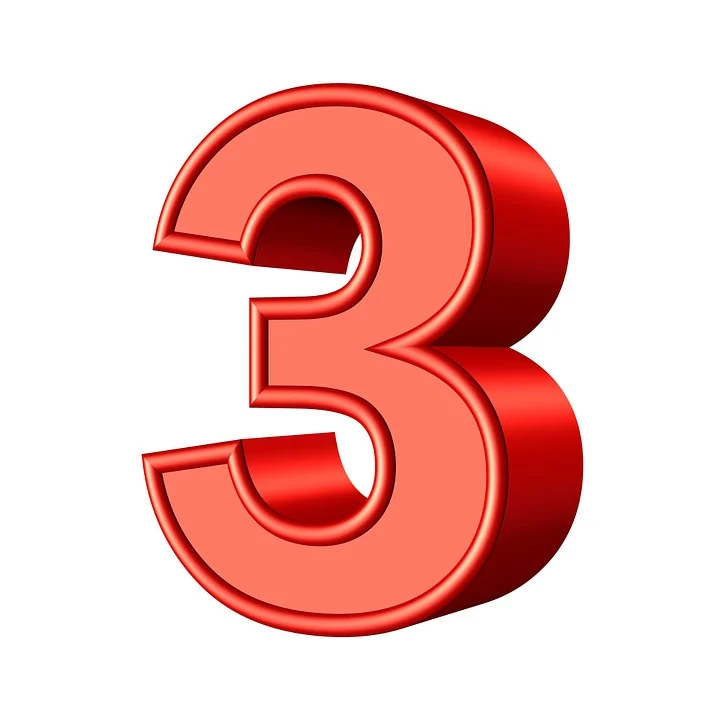

1/1 [==============================] - 0s 32ms/step
This hand written images is recognised as: 3


In [43]:
input_image_path= input('Path of the image to be predicted:')
input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)
input_image_resize = cv2.resize(grayscale,(28,28))

input_image_resize = input_image_resize/255
image_reshape = np.reshape(input_image_resize,[1, 28, 28])
input_prediction = model.predict(image_reshape)
input_pred_label = input_pred_label = np.argmax(input_prediction)

print('This hand written images is recognised as:',input_pred_label)